In [1]:
import pandas as pd
import numpy as np

# Define a consistent number of comments
comments_list = [
    "Sản phẩm rất tốt, tôi rất hài lòng!", "Không tốt như mong đợi.", "Giá cả hợp lý, chất lượng ổn.",
    "Giao hàng chậm nhưng sản phẩm ổn.", "Dịch vụ tệ, không bao giờ mua lại.", "Tuyệt vời! Đáng đồng tiền.",
    "Chất lượng tạm được, sẽ cân nhắc mua lần sau.", "Giao hàng nhanh, đúng mô tả.", "Sản phẩm không đúng như quảng cáo.",
    "Hài lòng với sản phẩm này!", "Khá ổn, nhưng có thể cải thiện thêm.", "Đáng tiếc là sản phẩm không tốt.",
    "Rất thích sản phẩm, sẽ ủng hộ lần sau.", "Không đáng tiền chút nào.", "Sản phẩm ổn, nhân viên nhiệt tình.",
    "Quá tuyệt vời, chất lượng vượt mong đợi!", "Dịch vụ tốt, hàng chất lượng.", "Không nên mua, thất vọng.",
    "Giao hàng nhanh, sản phẩm tạm ổn.", "Tốt trong tầm giá.", "Không có gì để chê!",
    "Sản phẩm bị lỗi khi nhận hàng.", "Sẽ giới thiệu cho bạn bè.", "Không hài lòng, dịch vụ chậm trễ.",
    "Sản phẩm đẹp và chắc chắn.", "Dịch vụ rất kém.", "Giao hàng siêu nhanh!", "Không giống như hình.",
    "Sản phẩm rất đáng mua.", "Giá rẻ, chất lượng thấp.", "Hài lòng về chất lượng sản phẩm.",
    "Sản phẩm xứng đáng với giá tiền.", "Không đáp ứng được mong đợi.", "Sản phẩm bị lỗi.",
    "Thất vọng vì chất lượng không như quảng cáo.", "Hàng đẹp, giao nhanh.", "Không hài lòng về sản phẩm.",
    "Quá trình mua hàng rất hài lòng.", "Hàng bị hỏng khi nhận.", "Chất lượng quá tệ!", "Dịch vụ tốt, sản phẩm ổn.",
    "Hàng đúng mô tả, chất lượng OK.", "Quá kém, không đáng mua.", "Sản phẩm phù hợp với giá.",
    "Hàng không như ý.", "Giao hàng nhanh, chất lượng tốt.", "Thất vọng, sản phẩm kém chất lượng.",
    "Rất đáng để mua.", "Không nên mua.", "Dịch vụ rất tốt, hài lòng.", "Sản phẩm tạm ổn."
] * 2  # Duplicate list to reach 100 comments

# Generate sample comments data
data = {
    "product_id": np.random.randint(1000, 1100, 100),  # Random product IDs between 1000 and 1100
    "user_id": np.random.randint(2000, 3000, 100),  # Random user IDs between 2000 and 3000
    "comment": comments_list[:100],  # Ensuring exactly 100 comments
    "rating": np.random.randint(1, 6, 100)  # Random ratings between 1 and 5
}

# Create DataFrame and save to CSV
df_comments = pd.DataFrame(data)
df_comments.to_csv("tiki_shopee_comments.csv", index=False)
print("File tiki_shopee_comments.csv đã được tạo thành công.")


File tiki_shopee_comments.csv đã được tạo thành công.


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Load comments data
df = pd.read_csv("tiki_shopee_comments.csv")

# Generate labels based on rating (assuming 4,5 are positive; 1,2 are negative; 3 is neutral)
df['label'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)

# Preprocess comments
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["comment"].values)
X = tokenizer.texts_to_sequences(df["comment"].values)
X = pad_sequences(X, maxlen=100)

# Labels for training
y = np.array(df['label'].values)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Predict sentiment for each comment
predictions = model.predict(X)
df['sentiment'] = ['positive' if pred > 0.5 else 'negative' for pred in predictions]
df['confidence'] = [pred if pred > 0.5 else 1 - pred for pred in predictions]

# Save the results to a new CSV file
df.to_csv("tiki_shopee_comments_with_sentiment_tensorflow.csv", index=False)
print("File tiki_shopee_comments_with_sentiment_tensorflow.csv đã được tạo với kết quả dự đoán cảm xúc.")


C:\Users\hoang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
3/3 - 5s - 2s/step - accuracy: 0.5250 - loss: 0.6912 - val_accuracy: 0.5500 - val_loss: 0.6920
Epoch 2/5
3/3 - 0s - 76ms/step - accuracy: 0.5625 - loss: 0.6873 - val_accuracy: 0.5500 - val_loss: 0.6900
Epoch 3/5
3/3 - 0s - 77ms/step - accuracy: 0.5625 - loss: 0.6792 - val_accuracy: 0.5500 - val_loss: 0.6890
Epoch 4/5
3/3 - 0s - 79ms/step - accuracy: 0.5625 - loss: 0.6757 - val_accuracy: 0.5500 - val_loss: 0.6885
Epoch 5/5
3/3 - 0s - 71ms/step - accuracy: 0.5625 - loss: 0.6656 - val_accuracy: 0.5500 - val_loss: 0.6880
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
File tiki_shopee_comments_with_sentiment_tensorflow.csv đã được tạo với kết quả dự đoán cảm xúc.


Epoch 1/5


C:\Users\hoang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 - 4s - 1s/step - accuracy: 0.4125 - loss: 0.6939 - val_accuracy: 0.5500 - val_loss: 0.6911
Epoch 2/5
3/3 - 0s - 75ms/step - accuracy: 0.5625 - loss: 0.6897 - val_accuracy: 0.5500 - val_loss: 0.6896
Epoch 3/5
3/3 - 0s - 70ms/step - accuracy: 0.5625 - loss: 0.6855 - val_accuracy: 0.5500 - val_loss: 0.6885
Epoch 4/5
3/3 - 0s - 67ms/step - accuracy: 0.5625 - loss: 0.6799 - val_accuracy: 0.5500 - val_loss: 0.6876
Epoch 5/5
3/3 - 0s - 71ms/step - accuracy: 0.5625 - loss: 0.6764 - val_accuracy: 0.5500 - val_loss: 0.6864
Epoch 1/5
3/3 - 3s - 1s/step - accuracy: 0.5375 - loss: 0.7179 - val_accuracy: 0.7000 - val_loss: 0.6748
Epoch 2/5
3/3 - 0s - 48ms/step - accuracy: 0.5625 - loss: 0.6951 - val_accuracy: 0.6000 - val_loss: 0.6839
Epoch 3/5
3/3 - 0s - 46ms/step - accuracy: 0.4875 - loss: 0.7134 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 4/5
3/3 - 0s - 44ms/step - accuracy: 0.4500 - loss: 0.7509 - val_accuracy: 0.5000 - val_loss: 0.6986
Epoch 5/5
3/3 - 0s - 45ms/step - accuracy: 0.5375 -

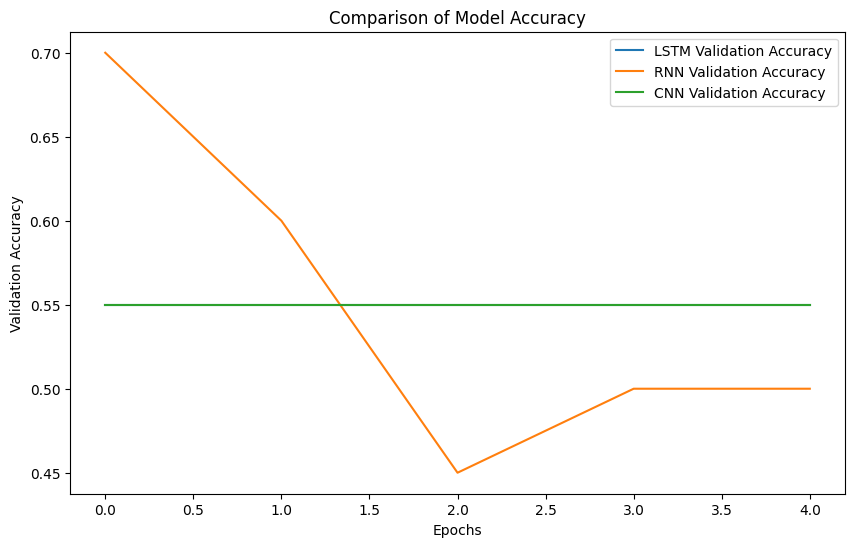

In [7]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("tiki_shopee_comments.csv")
df['label'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)  # 1 for positive, 0 for negative

# Preprocess comments
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["comment"].values)
X = tokenizer.texts_to_sequences(df["comment"].values)
X = pad_sequences(X, maxlen=100)

# Labels for training
y = np.array(df['label'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build model
def build_model(model_type):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=64, input_length=100),
        SpatialDropout1D(0.2)
    ])
    if model_type == 'LSTM':
        model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    elif model_type == 'RNN':
        model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))
    elif model_type == 'CNN':
        model.add(Conv1D(64, 3, activation="relu"))
        model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train models and record history
histories = {}
models = {}
for model_type in ['LSTM', 'RNN', 'CNN']:
    model = build_model(model_type)
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)
    histories[model_type] = history
    models[model_type] = model

# Function to predict sentiment
def predict_sentiment(comment):
    input_seq = tokenizer.texts_to_sequences([comment])
    input_seq = pad_sequences(input_seq, maxlen=100)
    predictions = {}
    for model_type, model in models.items():
        prob = model.predict(input_seq)[0][0]
        sentiment = "positive" if prob > 0.5 else "negative"
        confidence = prob if prob > 0.5 else 1 - prob
        predictions[model_type] = (sentiment, confidence)
    return predictions

# Function to plot model accuracy comparison
def plot_accuracy_comparison(histories):
    plt.figure(figsize=(10, 6))
    for model_type, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{model_type} Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.title("Comparison of Model Accuracy")
    plt.legend()
    plt.show()

# Tkinter GUI
root = tk.Tk()
root.title("Sentiment Analysis Prediction")

# Input field
tk.Label(root, text="Enter Comment:").grid(row=0, column=0, padx=10, pady=10)
comment_entry = tk.Entry(root, width=50)
comment_entry.grid(row=0, column=1, padx=10, pady=10)

# Prediction function
def on_predict():
    comment = comment_entry.get()
    if not comment:
        messagebox.showerror("Error", "Please enter a comment")
        return

    predictions = predict_sentiment(comment)
    result_text = "\n".join([f"{model_type}: {sentiment} (Confidence: {confidence:.2f})"
                             for model_type, (sentiment, confidence) in predictions.items()])
    messagebox.showinfo("Prediction Results", result_text)
    plot_accuracy_comparison(histories)

# Prediction button
predict_button = tk.Button(root, text="Predict Sentiment", command=on_predict)
predict_button.grid(row=1, column=0, columnspan=2, pady=10)

# Run GUI application
root.mainloop()
